In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Perceptron stuff

In [2]:
# AND gate
X = np.array([
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1],
])

# AND
y = np.array([0, 0, 0, 1], dtype=np.int8)

# OR
y = np.array([0, 1, 1, 1], dtype=np.int8)

# XOR
y = np.array([0, 1, 1, 0], dtype=np.int8)

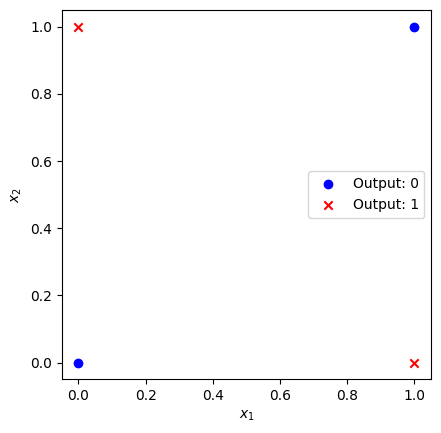

In [3]:
# plotting stuff
def plot_inputs(X, y):
    y_flat = y.flatten()
    fig, ax = plt.subplots(1, 1)
    ax.scatter(X[y_flat == 0,1],X[y_flat == 0,2],color="blue", marker="o", label="Output: 0")
    ax.scatter(X[y_flat == 1,1],X[y_flat == 1,2],color="red", marker="x", label="Output: 1")
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_aspect("equal")
    return fig, ax

def plot_decision(ax, w, colour=[0, 0, 0, 0.2], label=None):
    # We get a 1 if w0 + w1x1 + w2x2 >= 0, and a 0 otherwise.
    # solving for x2, we get x2 >= -(w0 + w1x1) / w2
    if abs(w[2]) > 0:
        slope = -w[1] / w[2]
        intercept = -w[0] / w[2]
        decision_x = np.array([-0.1, 1.1])
        ax.plot(decision_x, decision_x * slope + intercept, color=colour, label=label)

fig, ax = plot_inputs(X, y)
leg = ax.legend()

In [4]:
eta = 1 # early choice, gives integer weights

def step(v):
    """Heaviside step function"""
    return (v >= 0).astype(int)

# Initialize weights to zero
w = np.zeros(3)

y_hat = X @ w
iter = 0

while not all(y == y_hat):
    # Visualize progress
    plot_decision(ax, w)
    print(f"Iteration {iter}: w = {w}")
    
    # one instance at a time
    i = iter % 4
    y_hat[i] = step(w.T @ X[i,:])
    if y_hat[i] != y[i]:
        w += eta * (y[i] - y_hat[i]) * X[i,:]
    iter += 1

print(f"Final w = {w}")

plot_decision(ax, w, "green", "Final boundary")
ax.set_aspect("auto")
leg.remove()
leg = ax.legend()
ax.set_title(f"Solution converged after {iter} iterations")
fig


Iteration 0: w = [0. 0. 0.]
Iteration 1: w = [-1.  0.  0.]
Iteration 2: w = [0. 0. 1.]
Iteration 3: w = [0. 0. 1.]
Iteration 4: w = [-1. -1.  0.]
Iteration 5: w = [-1. -1.  0.]
Iteration 6: w = [ 0. -1.  1.]
Iteration 7: w = [1. 0. 1.]
Iteration 8: w = [ 0. -1.  0.]
Iteration 9: w = [-1. -1.  0.]
Iteration 10: w = [ 0. -1.  1.]
Iteration 11: w = [1. 0. 1.]
Iteration 12: w = [ 0. -1.  0.]
Iteration 13: w = [-1. -1.  0.]
Iteration 14: w = [ 0. -1.  1.]
Iteration 15: w = [1. 0. 1.]
Iteration 16: w = [ 0. -1.  0.]
Iteration 17: w = [-1. -1.  0.]
Iteration 18: w = [ 0. -1.  1.]
Iteration 19: w = [1. 0. 1.]
Iteration 20: w = [ 0. -1.  0.]
Iteration 21: w = [-1. -1.  0.]
Iteration 22: w = [ 0. -1.  1.]
Iteration 23: w = [1. 0. 1.]
Iteration 24: w = [ 0. -1.  0.]
Iteration 25: w = [-1. -1.  0.]
Iteration 26: w = [ 0. -1.  1.]
Iteration 27: w = [1. 0. 1.]
Iteration 28: w = [ 0. -1.  0.]
Iteration 29: w = [-1. -1.  0.]
Iteration 30: w = [ 0. -1.  1.]
Iteration 31: w = [1. 0. 1.]
Iteration 32: w 

KeyboardInterrupt: 

[0 1 1 0]


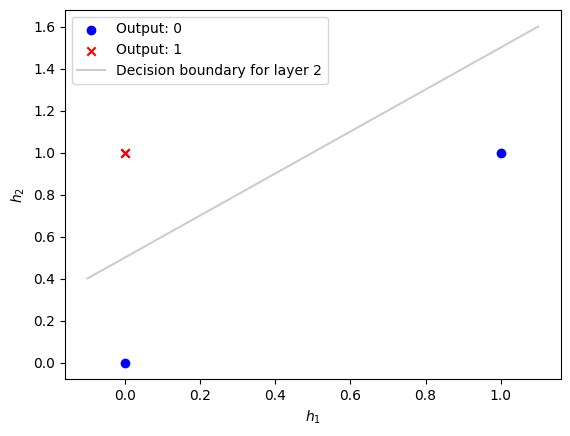

In [5]:
# Verify XOR solution
# X is unchanged from prior inputs
y_xor = np.array([0, 1, 1, 0])
w_1 = np.array([
    [-3/2, -1/2],
    [1, 1],
    [1, 1],
])

# intermediate "hidden" space - inputs to the next layer
H = step(X @ w_1)

# add on the bias term for the hidden layer
H = np.column_stack((np.ones(4), H))
w_2 = np.array([-0.5, -1, 1])

fig_h, ax_h = plot_inputs(H, y_xor)
plot_decision(ax_h, w_2, label="Decision boundary for layer 2")
ax_h.set_aspect("auto")
ax_h.set_xlabel("$h_1$")
ax_h.set_ylabel("$h_2$")
ax_h.legend()

print(step(H @ w_2))

## Backpropagation examples

In [6]:
# toy mlp example
# forward pass
X = np.array([2, 3])
y = 1
W1 = np.array([[-0.78, 0.13], [0.85, 0.23]])
W2 = np.array([1.8, 0.40])


In [7]:
X @ W1 @ W2

np.float64(2.1619999999999995)

In [12]:

iterations = 20
eta = 0.01
loss = np.zeros(iterations)

def f(Z):
    # sigmoid ? 
    return 1 / (1 + np.exp(-X))

def d_f(Z):
    return (f(Z) @ (1 - f(Z))).T

for i in range(iterations):
    # forward pass
    y_hat = f(X @ W1) @ W2
    
    # update loss to keep track of performance
    loss[i] = (y_hat - y)**2

    # backpropagate!
    w2_partials = (y_hat - y) * (f(X @ W1))
    w1_partials = w2_partials @ d_f(f(X @ W1)) @ X

    # take a step in the opposite direction
    W1 = W1 - eta * w1_partials
    W2 = W2 - eta * w2_partials

plt.plot(loss)

# check how well we did
print("Final prediction:", X @ W1 @ W2)

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)